# The Schechter Function

The Schechter function (Schechter 1975) is an analytic expression for the luminocity of galaxies which can be written as follows:

$$\phi(L) = \left( \frac{\phi^*}{L^*} \right) \left( \frac{L}{L^*} \right)^\alpha \exp{\left( -\frac{L}{L^*} \right)}$$

This function essentially describes the number of galaxies in the given range of luminocity $L$ to $L+dL$. It is evident from the above equation that it is a three parameter function with parameters $\phi^*$, $L^*$ and $\alpha$. Here, $\alpha$ represents the power-law parameter for the faint-end and $L^*$ is the characteristic luminocity, while $\phi*$ serves as the normalisation constant.

The aforementioned Schechter function is the function of the luminocities, but in practice, one can tranlate the function into the function of the absolute magnitude of the galaxies. Such function can be written as,

$$ \phi(M) = 0.921 \phi^* 10^{0.4(\alpha + 1)(M^* - M)} \exp{\left( -10^{0.4(M^* - M)} \right)}$$

Here, $M$ and $M^*$ represents the absolute magnitude and the characteristic absolute magnitude respectively.

Below we try to write a simple python function to calculate the Schechter function.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def schechter(M, phi1, m1, alpha):
    """
    The Schechter Function
    as described above.
    -------------------
    Parameters:
    -----------
    M : float, or numpy.ndarray
        absolute magnitude of the galaxies
    phi1 : float
        the normalisation constant
    m1 : float
        the characteristic absolute magnitude
    alpha : float
        the faint-end slope of power-law function
    -----------
    returns
    -----------
    float or numpy.ndarray
        number of galaxies in given absolute magnitude range
    """
    ab = 0.921*phi1
    cd = 10**(0.4*(alpha + 1)*(m1 - M))
    ef = np.exp(-10**(0.4*(m1-M)))
    return ab*cd*ef

Below, we try to plot the Schechter function for the range of absolute magnitudes $M=-19$ to $M=-25$ with the characteristic magnitude $M^*=-19$, the faint-end slope for the power law to $-1$ and the normalisation constant $\phi^* = 1$.

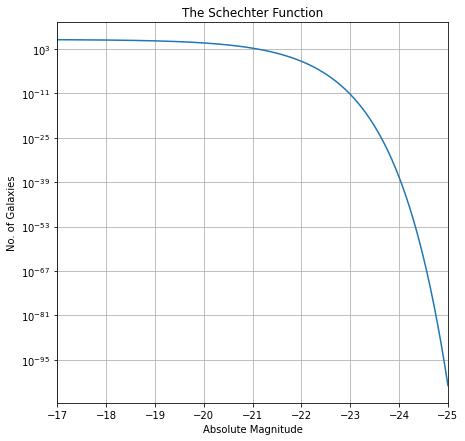

In [14]:
m_abs = np.linspace(-25, -16, 1000)
phi1 = 1000000
m1 = -19
al = -1

nos = schechter(m_abs, phi1, m1, al)

figure, ax = plt.subplots(figsize=(7,7))
ax.plot(m_abs, nos)
ax.set_xlim(-17, -25)
ax.set_yscale('log')
ax.set_xlabel('Absolute Magnitude')
ax.set_ylabel('No. of Galaxies')
ax.set_title('The Schechter Function')
ax.grid()